In [ ]:
#Python question - is there a correlation between the number of playlist a song appears in and the amount of sales?

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
Dim_playlist=pd.read_csv('/content/Dim_playlist.csv')
Fact_invoiceline=pd.read_csv('/content/Fact_invoiceline.csv')

In [19]:
song_playlist_count = Dim_playlist.groupby("trackid").size().reset_index(name="playlist_count") #On how many playlist is each track
song_playlist_count

,trackid,playlist_count
0,1,3
1,2,3
2,3,4
3,4,4
4,5,4
...,...,...
3498,3499,5
3499,3500,4
3500,3501,4
3501,3502,4


In [48]:
playlist_sales=pd.merge(song_playlist_count,Fact_invoiceline,on='trackid',how='left')
playlist_sales=playlist_sales[['trackid','playlist_count','quantity']]
playlist_sales=playlist_sales.groupby(['trackid','playlist_count']).sum().reset_index() #How many times was each track sold
print(playlist_sales["quantity"].max()) #Know the maximum quantity
print(playlist_sales["playlist_count"].max())#Know the maximum playlist_count

13.0
5


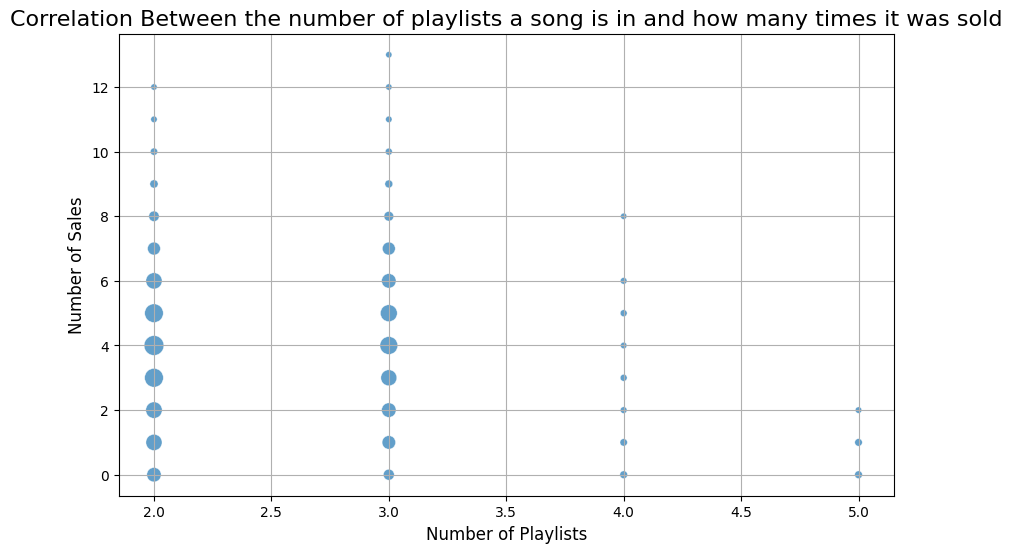

In [54]:
occurences = playlist_sales.groupby(['playlist_count', 'quantity']).size().reset_index(name='count')
#Get how many times we will have the same combination of quantity and playlist_count

plt.figure(figsize=(10, 6))
sns.scatterplot(data=occurences, x="playlist_count", y="quantity", size="count", sizes=(20, 200), legend=False, alpha=0.7) #Creater scatterplot
#Create scatterplot where the size of the points varies according to the frequency of each combination of playlist_count and quantity

plt.title("Correlation Between the number of playlists a song is in and how many times it was sold", fontsize=16)
plt.xlabel("Number of Playlists", fontsize=12)
plt.ylabel("Number of Sales", fontsize=12)
plt.grid(True)

plt.show()

In [50]:
#There appears to be no clear relationship between the number of playlists a song is featured in and the number of times it has been sold